### Credit Card Customer Segmentation

In [1]:
# Load Core Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

#### Load the data

In [2]:
credit= pd.read_csv("C:/Users/hp/Desktop/Data Glacier Intership/Data/Credit Card Customers/Bank Credit Card.csv")

In [3]:
# View first five instances, cases 
credit.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,(76) 880-5383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,(81) 877-0008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,(71) 398-2108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,(76) 991-1858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,(70) 910-6358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
### Selecing Only Existing Cutomer 
credit_card = credit[credit['Attrition_Flag']=="Existing Customer"]
credit_card.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,(76) 880-5383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,(81) 877-0008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,(71) 398-2108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


### EDA and  Data Preprocessing 

##### a)Checking for the Structure of the Data and For missing Values 

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 0 to 10122
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8500 non-null   object 
 1   Attrition_Flag            8500 non-null   object 
 2   Customer_Age              8500 non-null   int64  
 3   Gender                    8500 non-null   object 
 4   Dependent_count           8500 non-null   int64  
 5   Education_Level           8500 non-null   object 
 6   Marital_Status            8500 non-null   object 
 7   Income_Category           8500 non-null   object 
 8   Card_Category             8500 non-null   object 
 9   Months_on_book            8500 non-null   int64  
 10  Total_Relationship_Count  8500 non-null   int64  
 11  Months_Inactive_12_mon    8500 non-null   int64  
 12  Contacts_Count_12_mon     8500 non-null   int64  
 13  Credit_Limit              8500 non-null   float64
 14  Total_R

There is no missing value in the data. Most of the variables are numeric variables , while only few are categorical


###### Variables 
Customer can be segmented based on Age, Gender, Marital Status, Location , Life stage for a business to Customer Marketing while for a business to business marketing customer can be segmented based on Industry, Numbers of Employee, previously purchased products and Location.

We will be selecting the  Customer_Age , Gender, Education_Level,Marital_Status,Income_Category,Credit_Limit for the segementation analysis

##### b) EDA

In [6]:
# Numerical Columns
cols = ["Customer_Age","Gender","Education_Level","Marital_Status","Income_Category","Credit_Limit"]
cols

['Customer_Age',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Credit_Limit']

In [7]:
data= credit_card[cols]
data.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,M,High School,Married,$60K - $80K,12691.0
1,49,F,Graduate,Single,Less than $40K,8256.0
2,51,M,Graduate,Married,$80K - $120K,3418.0


In [8]:
# Numerical Columns
num_col= data.columns[data.dtypes != "object"]
print("Numerical  Columns:", num_col,"\n\n")

# Categorical Colums
cat_col = data.columns[data.dtypes == "object"]
print("Categorical Columns: ", cat_col)

Numerical  Columns: Index(['Customer_Age', 'Credit_Limit'], dtype='object') 


Categorical Columns:  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category'], dtype='object')


------------------------------------------------------------------------------------------------------------
EXPLORATORY DATA  ANALYSIS: Customer_Age
------------------------------------------------------------------------------------------------------------
count    8500.000000
mean       46.262118
std         8.081157
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: Customer_Age, dtype: float64
------------------------------------------------------------------------------------------------------------


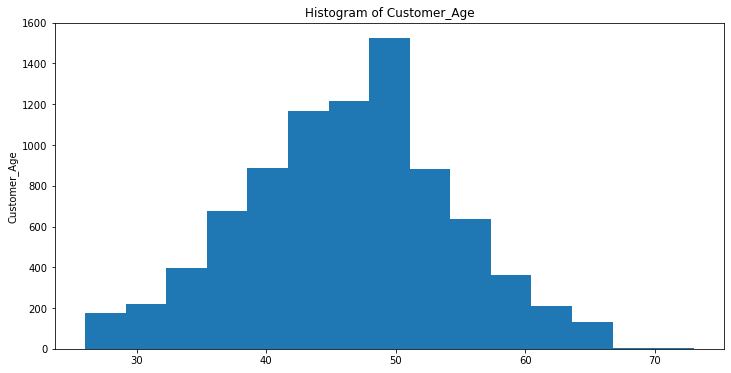

------------------------------------------------------------------------------------------------------------


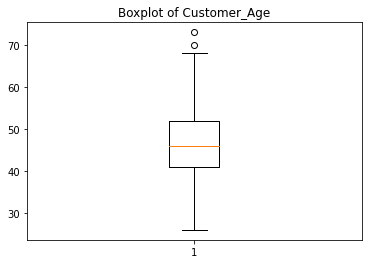

------------------------------------------------------------------------------------------------------------
EXPLORATORY DATA  ANALYSIS: Credit_Limit
------------------------------------------------------------------------------------------------------------
count     8500.000000
mean      8726.877518
std       9084.969807
min       1438.300000
25%       2602.000000
50%       4643.500000
75%      11252.750000
max      34516.000000
Name: Credit_Limit, dtype: float64
------------------------------------------------------------------------------------------------------------


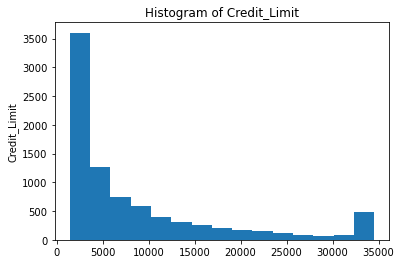

------------------------------------------------------------------------------------------------------------


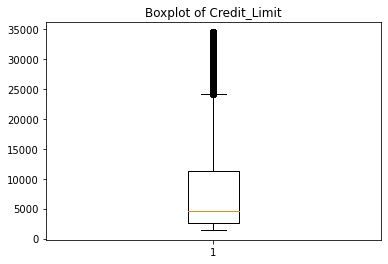

In [9]:
## Discriptive Analysis
plt.figure(figsize=(12,6))

for col in num_col:
    print("------------------------------------------------------------------------------------------------------------")
    print("EXPLORATORY DATA  ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    
    print(data[col].describe())
    # histogram
    
    print("------------------------------------------------------------------------------------------------------------")
    plt.hist(data[col], bins=15)
    plt.ylabel(col)
    plt.title("Histogram of "+ col)
    plt.savefig("hist"+col)
    plt.show()
    
    print("------------------------------------------------------------------------------------------------------------")
    
    
    plt.boxplot(data[col],)
    plt.title("Boxplot of "+ col)
    plt.savefig("box"+col)
    plt.show()
    

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Education_Level
------------------------------------------------------------------------------------------------------------
Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: Education_Level, dtype: int64


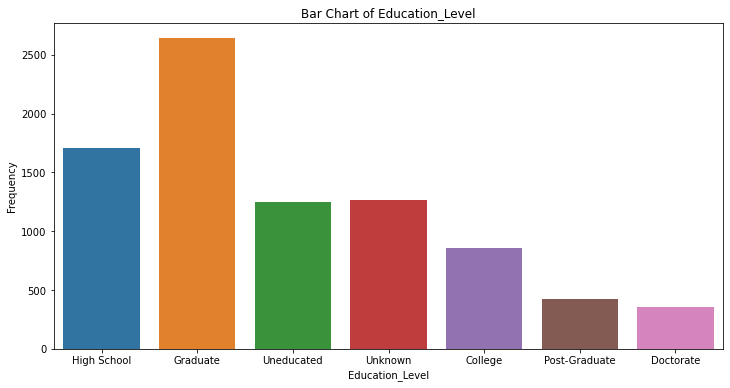

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Marital_Status
------------------------------------------------------------------------------------------------------------
Married     3978
Single      3275
Divorced     627
Unknown      620
Name: Marital_Status, dtype: int64


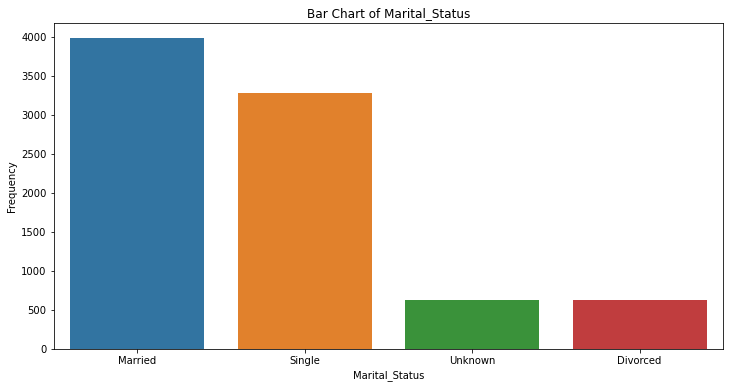

------------------------------------------------------------------------------------------------------------
DESCRIPTIVE ANALYSIS: Income_Category
------------------------------------------------------------------------------------------------------------
Less than $40K    2949
$40K - $60K       1519
$80K - $120K      1293
$60K - $80K       1213
Unknown            925
$120K +            601
Name: Income_Category, dtype: int64


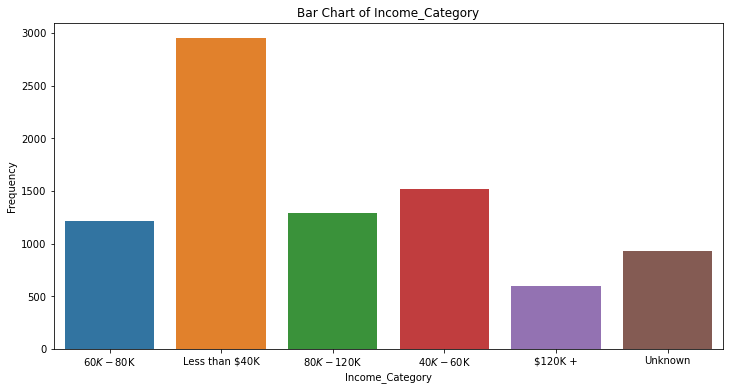

In [10]:
## Discriptive Analysis

for col in cat_col[1:]:
    plt.figure(figsize=(12,6))
    print("------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE ANALYSIS:", col)
    print("------------------------------------------------------------------------------------------------------------")
    print(credit_card[col].value_counts())
    sns.countplot(credit_card[col])
    plt.ylabel('Frequency')
    plt.title("Bar Chart of "+ col)
    plt.savefig(col)
    plt.show()
    
   

#### Label Encoding
Kmeans algorithm can not work efficintly with the categorical varibles, we therfore encode them into numerical varaibles

In [11]:
## creating a Copy of the Variable
data_adjusted = data.copy()

In [12]:
for col in cat_col:
    labelencoder= LabelEncoder()
    data_adjusted[col]= labelencoder.fit_transform(data_adjusted[col])

In [13]:
#### View the Dataset
data_adjusted.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,1,3,1,2,12691.0
1,49,0,2,2,4,8256.0
2,51,1,2,1,3,3418.0


#### Scaling the datasets
Scaling was perform to give all the varaibles equal weight. We dont want any varibles have a large influnece on the clustreing algorithm

In [14]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(data_adjusted)
scaled_data = pd.DataFrame(scaled_data,columns=data_adjusted.columns)
scaled_data.head(5)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,-0.156190,1.042797,-0.050294,-0.621540,-0.567691,0.436364
1,0.338818,-0.958959,-0.596270,0.737279,0.764365,-0.051833
2,0.586322,1.042797,-0.596270,-0.621540,0.098337,-0.584393
3,-0.774949,-0.958959,-0.050294,2.096098,0.764365,-0.595951
4,-0.774949,1.042797,1.041658,-0.621540,-0.567691,-0.441511


##### Selecting K

In [15]:
## Elbow Method for Selecting K
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=300,random_state=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

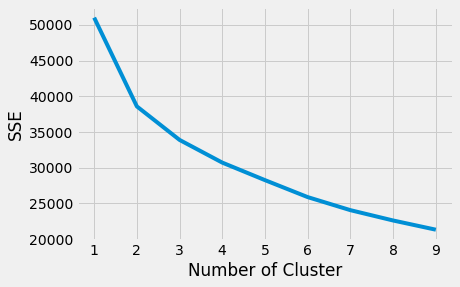

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1),sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [18]:
### USig the Kneed PAckahe to Selec the Cluster
K1 = KneeLocator(np.arange(1,10,1),sse,curve="convex",direction="decreasing")
K1.elbow

3

#### Clustering - Kmeans

In [19]:
# Initializing the model
kmeans = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=10)
# Fitting the model
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=10)

In [20]:
clusters= kmeans.labels_
clusters

array([0, 1, 0, ..., 0, 1, 0])

#### Dimensional Reduction

In [21]:
pca = PCA(n_components=2,random_state=0)
principal_components = pca.fit_transform(scaled_data)
principal_componentsDF = pd.DataFrame(principal_components,columns=["PC1","PC2"])

In [22]:
principal_componentsDF["Cluster"] = clusters+ 1
principal_componentsDF.head()

,PC1,PC2,Cluster
0,1.213071,-0.414698,1
1,-1.083679,0.237187,2
2,0.314223,-1.050481,1
3,-1.325802,2.010037,2
4,0.786355,0.214111,1


In [23]:
principal_componentsDF['Label'] =principal_componentsDF["Cluster"].map({1:"Cluster 1",2:"Clsuter 2",3:"Cluster 3"})
principal_componentsDF

,PC1,PC2,Cluster,Label
0,1.213071,-0.414698,1,Cluster 1
1,-1.083679,0.237187,2,Clsuter 2
2,0.314223,-1.050481,1,Cluster 1
3,-1.325802,2.010037,2,Clsuter 2
4,0.786355,0.214111,1,Cluster 1
...,...,...,...,...
8495,0.865651,0.054159,1,Cluster 1
8496,1.103188,-1.328193,3,Cluster 3
8497,1.291786,-0.029184,1,Cluster 1
8498,-1.339673,-0.303438,2,Clsuter 2


<Figure size 720x1440 with 0 Axes>

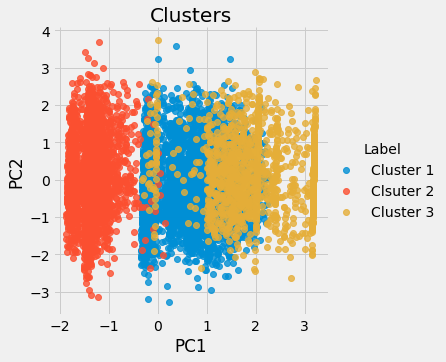

In [24]:
plt.figure(figsize=(10,20))
ax=sns.lmplot(data=principal_componentsDF,x="PC1",y="PC2",hue="Label",fit_reg=False,legend=True,legend_out=True)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.savefig("kmeans_cluster")
plt.show()

In [25]:
data["Cluster"] = principal_componentsDF["Cluster"]
data["Label"] =principal_componentsDF["Label"]
data.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster,Label
0,45,M,High School,Married,$60K - $80K,12691.0,1.0,Cluster 1
1,49,F,Graduate,Single,Less than $40K,8256.0,2.0,Clsuter 2
2,51,M,Graduate,Married,$80K - $120K,3418.0,1.0,Cluster 1


### Cluster One

In [26]:
C1 = data[data["Cluster"]==1]
C1.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster,Label
0,45,M,High School,Married,$60K - $80K,12691.0,1.0,Cluster 1
2,51,M,Graduate,Married,$80K - $120K,3418.0,1.0,Cluster 1
4,40,M,Uneducated,Married,$60K - $80K,4716.0,1.0,Cluster 1
5,44,M,Graduate,Married,$40K - $60K,4010.0,1.0,Cluster 1
9,48,M,Graduate,Single,$80K - $120K,11656.0,1.0,Cluster 1
10,42,M,Uneducated,Unknown,$120K +,6748.0,1.0,Cluster 1
11,65,M,Unknown,Married,$40K - $60K,9095.0,1.0,Cluster 1
12,56,M,College,Single,$80K - $120K,11751.0,1.0,Cluster 1
13,35,M,Graduate,Unknown,$60K - $80K,8547.0,1.0,Cluster 1
15,44,M,Unknown,Unknown,$80K - $120K,4234.0,1.0,Cluster 1


### Cluster Two

In [27]:
C2 = data[data["Cluster"]==2]
C2.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster,Label
1,49,F,Graduate,Single,Less than $40K,8256.0,2.0,Clsuter 2
3,40,F,High School,Unknown,Less than $40K,3313.0,2.0,Clsuter 2
14,57,F,Graduate,Married,Less than $40K,2436.0,2.0,Clsuter 2
19,45,F,Graduate,Married,Unknown,14470.0,2.0,Clsuter 2
22,41,M,High School,Married,$40K - $60K,4470.0,2.0,Clsuter 2
24,54,M,Unknown,Married,$80K - $120K,12217.0,2.0,Clsuter 2
27,63,M,Unknown,Married,$60K - $80K,10215.0,2.0,Clsuter 2
32,41,M,Graduate,Married,$60K - $80K,8923.0,2.0,Clsuter 2
34,58,M,Graduate,Married,$80K - $120K,12555.0,2.0,Clsuter 2
35,55,F,College,Single,Less than $40K,3520.0,2.0,Clsuter 2


### Cluster Three

In [28]:
C3 = data[data["Cluster"]==3]
C3.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster,Label
6,51,M,Unknown,Married,$120K +,34516.0,3.0,Cluster 3
7,32,M,High School,Unknown,$60K - $80K,29081.0,3.0,Cluster 3
8,37,M,Uneducated,Single,$60K - $80K,22352.0,3.0,Cluster 3
16,48,M,Post-Graduate,Single,$80K - $120K,30367.0,3.0,Cluster 3
20,47,M,Doctorate,Divorced,$60K - $80K,20979.0,3.0,Cluster 3
38,57,F,Graduate,Unknown,$40K - $60K,3672.0,3.0,Cluster 3
43,49,M,High School,Married,$60K - $80K,3906.0,3.0,Cluster 3
46,56,M,Doctorate,Married,$60K - $80K,2283.0,3.0,Cluster 3
50,52,F,Unknown,Married,Less than $40K,2622.0,3.0,Cluster 3
58,44,F,Graduate,Married,Unknown,6273.0,3.0,Cluster 3


### Thank You..